### Exploratory Data Analysis


About

inspired by:

[Text_summarization_EDA.ipynb](https://github.com/edumunozsala/Text-Summarization-Guide/blob/main/Text_summarization_EDA.ipynb)

[Exploratory Data Analysis on Text Data](https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad)

Last updated: 2024-05-11

Created by: Oksana Kalytenko

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('universal_tagset')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

#Create the list of stopwords
stopwords = nltk.corpus.stopwords.words('english')
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

# Import the wordcloud library
from wordcloud import WordCloud

/Users/oksanakalytenko/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/oksanakalytenko/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# Load the CSV file again into a DataFrame
webis_tldr_subreddit = pd.read_csv("data/cleaned_webis_tldr_subreddit_explainlikeimfive.csv",  sep = ';')

# Display the DataFrame
webis_tldr_subreddit.head()

,author,body,normalizedBody,subreddit,subreddit_id,id,content,summary
0,Cypriotmenace,Think of it like mailing pages of a book to di...,Think of it like mailing pages of a book to di...,explainlikeimfive,t5_2sokd,c6dydfx,think of it like mailing pages of a book to di...,"always look for the highest seeded torrents, a..."
1,senatorskeletor,"""Redistribution"" is short for ""redistribution ...","""Redistribution"" is short for ""redistribution ...",explainlikeimfive,t5_2sokd,c6whsmv,"redistribution"" is short for ""redistribution o...",1) using the tax system to take money from the...
2,callumgg,"The Chinese system isn't exactly transparent, ...","The Chinese system isn't exactly transparent, ...",explainlikeimfive,t5_2sokd,c6y9grw,"the chinese system isn't exactly transparent, ...",2700 delegates and representatives from all ov...
3,mcanerin,Here is an analogy I've used before and might ...,Here is an analogy I've used before and might ...,explainlikeimfive,t5_2sokd,c6yj68l,here is an analogy i've used before and might ...,"the communist party isn't a political party, i..."
4,neo45,"This is a complicated question, but I think it...","This is a complicated question, but I think it...",explainlikeimfive,t5_2sokd,c7fuozw,"this is a complicated question, but i think it...","there's lots of good actors out there, but ver..."


In [3]:
webis_tldr_subreddit.loc[:, 'doc_len'] = [len(doc.split()) for doc in webis_tldr_subreddit['content']]
webis_tldr_subreddit.loc[:, 'tldr_len'] = [len(tldr.split()) for tldr in webis_tldr_subreddit['summary']]

In [4]:
print("**Source texts**")
print(f"Mean length: {round(webis_tldr_subreddit['doc_len'].mean(),2)} words")
print(f"Length std: {round(webis_tldr_subreddit['doc_len'].std(), 2)}")
print(f"Minimum number of words: {webis_tldr_subreddit['doc_len'].min()}")
print(f"Maximum number of words: {webis_tldr_subreddit['doc_len'].max()}")

**Source texts**
Mean length: 216.43 words
Length std: 191.5
Minimum number of words: 2
Maximum number of words: 2802


In [5]:
print("**Tldr summaries**")
print(f"Mean length: {round(webis_tldr_subreddit['tldr_len'].mean(),2)} words")
print(f"Length std: {round(webis_tldr_subreddit['tldr_len'].std(), 2)}")
print(f"Minimum number of words: {webis_tldr_subreddit['tldr_len'].min()}")
print(f"Maximum number of words: {webis_tldr_subreddit['tldr_len'].max()}")

**Tldr summaries**
Mean length: 26.04 words
Length std: 29.37
Minimum number of words: 1
Maximum number of words: 613


In [6]:
webis_tldr_subreddit.loc[:, 'tldr_doc_ratio'] = webis_tldr_subreddit['tldr_len']/webis_tldr_subreddit['doc_len']

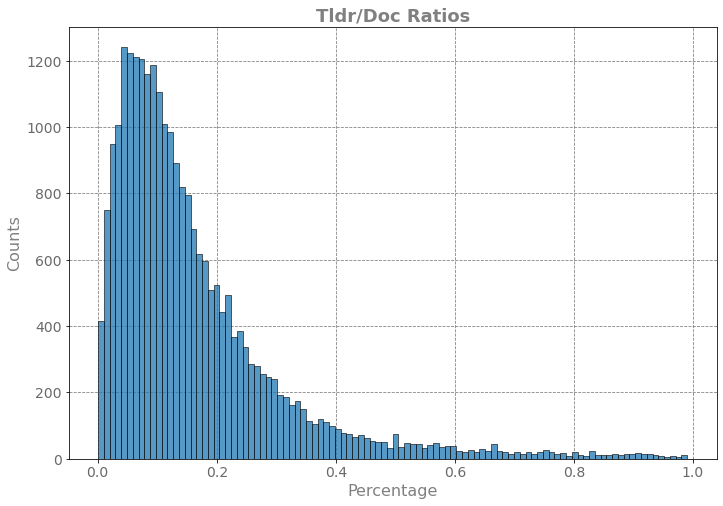

In [7]:
ratios = webis_tldr_subreddit['tldr_doc_ratio'].sort_values(ascending=False)
# Dist plot
fig = plt.figure(figsize =[9,6])
fig.patch.set_facecolor('xkcd:white')

ax = fig.add_axes([0,0,1,1])
sns.histplot(ratios)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.yaxis.grid(color='gray', linestyle='dashed')

plt.title('Tldr/Doc Ratios', fontsize=18, color='grey', fontweight='bold')
plt.xlabel('Percentage', fontsize=16, color='grey')
plt.ylabel('Counts', fontsize=16, color='grey')

plt.xticks(fontsize=14, color='dimgrey')
plt.yticks(fontsize=14, color='dimgrey')
plt.show()

In [8]:
webis_tldr_subreddit_sample = webis_tldr_subreddit.head(500)

In [9]:
webis_tldr_subreddit_sample

,author,body,normalizedBody,subreddit,subreddit_id,id,content,summary,doc_len,tldr_len,tldr_doc_ratio
0,Cypriotmenace,Think of it like mailing pages of a book to di...,Think of it like mailing pages of a book to di...,explainlikeimfive,t5_2sokd,c6dydfx,think of it like mailing pages of a book to di...,"always look for the highest seeded torrents, a...",166,10,0.060241
1,senatorskeletor,"""Redistribution"" is short for ""redistribution ...","""Redistribution"" is short for ""redistribution ...",explainlikeimfive,t5_2sokd,c6whsmv,"redistribution"" is short for ""redistribution o...",1) using the tax system to take money from the...,326,32,0.098160
2,callumgg,"The Chinese system isn't exactly transparent, ...","The Chinese system isn't exactly transparent, ...",explainlikeimfive,t5_2sokd,c6y9grw,"the chinese system isn't exactly transparent, ...",2700 delegates and representatives from all ov...,226,64,0.283186
3,mcanerin,Here is an analogy I've used before and might ...,Here is an analogy I've used before and might ...,explainlikeimfive,t5_2sokd,c6yj68l,here is an analogy i've used before and might ...,"the communist party isn't a political party, i...",621,27,0.043478
4,neo45,"This is a complicated question, but I think it...","This is a complicated question, but I think it...",explainlikeimfive,t5_2sokd,c7fuozw,"this is a complicated question, but i think it...","there's lots of good actors out there, but ver...",291,32,0.109966
...,...,...,...,...,...,...,...,...,...,...,...
495,I30T,An analogy:\n\nSuppose a tree makes 100 pieces...,An analogy: \n Suppose a tree makes 100 pieces...,explainlikeimfive,t5_2sokd,ckp8my7,an analogy: \n suppose a tree makes 100 pieces...,national debts provide the illusion that you h...,192,22,0.114583
496,7LBoots,"For the most part, it comes down to fast- and ...","For the most part, it comes down to fast- and ...",explainlikeimfive,t5_2sokd,ckx8ufn,"for the most part, it comes down to fast- and ...","a chimp can rip your arm off, but it will neve...",327,14,0.042813
497,SexiasMaximus,There are actually several types of touchscree...,There are actually several types of touchscree...,explainlikeimfive,t5_2sokd,cl2ik1d,there are actually several types of touchscree...,"they make an electrical contact at point x,y o...",177,17,0.096045
498,FanofEmmaG,Many people on here have already pointed out t...,Many people on here have already pointed out t...,explainlikeimfive,t5_2sokd,cl30om8,many people on here have already pointed out t...,muslims coming to america tend to be better of...,231,19,0.082251


In [10]:
webis_tldr_subreddit_sample.iloc[0]['content']

"think of it like mailing pages of a book to different people who own photocopiers. if you have the full set, a, b and c, and then you give three people one of those pages after you've photocopied them, there are now 2 people out of 4 who have a, b or c. then, everyone photocopies what they have and redistributes it, which means that you don't have to send out 3 copies of the same file, only 2, and the others contribute one. \n same works with torrenting; the more people there are that have a piece of the file, the easier it is to get hold of, and the less each person has to contribute. as soon as someone has a piece, their connection uploads it to torrent programs that want it, and in return they can get pieces from other people. essentially, the more people involved, the faster the file spreads, because everyone can start copying and sending off the parts they already have."

In [11]:
def clean_text(doc, stopwords):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stopwords])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [12]:
#Clean the source text and te summary in our dataset
cleaned_content = webis_tldr_subreddit_sample['content'].apply(lambda x : clean_text(x, stopwords))
cleaned_summary = webis_tldr_subreddit_sample['summary'].apply(lambda x : clean_text(x, stopwords))

In [13]:
cleaned_content[0]

'think like mailing page book different people photocopier full set a b c give three people one page photocopied them 2 people 4 a b c then everyone photocopy redistributes it mean send 3 copy file 2 others contribute one work torrenting people piece file easier get hold of le person contribute soon someone piece connection uploads torrent program want it return get piece people essentially people involved faster file spread everyone start copying sending part already have'

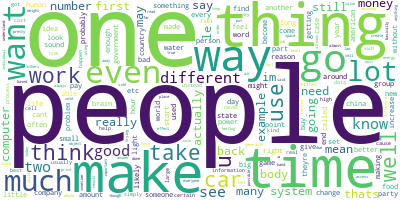

In [14]:
# Join the different processed texts together.
long_string_content = ' '.join(list(cleaned_content.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=10000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string_content)
# Visualize the word cloud
wordcloud.to_image()

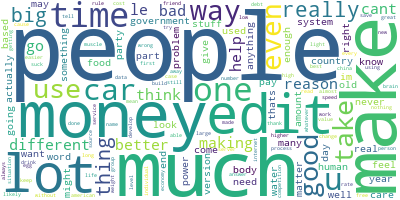

In [15]:
# Join the different processed titles together.
long_string_summary = ' '.join(list(cleaned_summary.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=10000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string_summary)
# Visualize the word cloud
wordcloud.to_image()

#### My ideas & proposal for the project:

topic analysis, find the most common topics within some subreddit. then use the authors of reddits info and try to find the relashionship between different users and different topic. How do they get grouped? Plot network analysis in the end and analyse the results. have fun.

Also would be cool to see it over time, or add the sentiment over the time and see how it changes.

try Lexicon-based sentiment analysis